<a href="https://colab.research.google.com/github/alifiya13/USCIS-H1B-Data-Analysis/blob/main/H1B_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA PRE-PROCESSING AND EDA


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
file_path = '/content/drive/MyDrive/USCIS_H1B_data.csv'
df = pd.read_csv(file_path, encoding='UTF-16', delimiter='\t')
df.head()

<ipython-input-2-c2dacea6682e>:3: DtypeWarning: Columns (9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='UTF-16', delimiter='\t')


,Line by line,Fiscal Year,Employer (Petitioner) Name,Tax ID,Industry (NAICS) Code,Petitioner City,Petitioner State,Petitioner Zip Code,Initial Approval,Initial Denial,Continuing Approval,Continuing Denial
0,1,2024,NaN,3581.0,"54 - Professional, Scientific, and Technical S...",LAFAYETTE,CA,94549.0,0,0,1,0
1,2,2024,NaN,4245.0,62 - Health Care and Social Assistance,DAVIE,FL,33328.0,1,0,0,0
2,3,2024,1 800 FLOWERS COM INC,7311.0,44-45 - Retail Trade,JERICHO,NY,11753.0,1,0,5,0
3,4,2024,1 HOTEL KAUAI LLC DBA 1 HOTEL HANALEI BAY,5669.0,72 - Accommodation and Food Services,MIAMI,FL,33133.0,0,0,1,0
4,5,2024,1 OAK MEDIA LLC,7999.0,"54 - Professional, Scientific, and Technical S...",LINCOLN CITY,OR,97367.0,1,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355982 entries, 0 to 355981
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Line by line                355982 non-null  object 
 1   Fiscal Year                 355982 non-null  int64  
 2   Employer (Petitioner) Name  355969 non-null  object 
 3   Tax ID                      351562 non-null  float64
 4   Industry (NAICS) Code       338051 non-null  object 
 5   Petitioner City             355980 non-null  object 
 6   Petitioner State            355963 non-null  object 
 7   Petitioner Zip Code         355947 non-null  float64
 8   Initial Approval            355982 non-null  object 
 9   Initial Denial              355982 non-null  object 
 10  Continuing Approval         355982 non-null  object 
 11  Continuing Denial           355982 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 32.6+ MB


In [4]:
# Step 1: Drop unnecessary columns
df.drop(columns=["Line by line"], inplace=True)

# Step 2: Rename columns for consistency
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df.head()

,fiscal_year,employer_(petitioner)_name,tax_id,industry_(naics)_code,petitioner_city,petitioner_state,petitioner_zip_code,initial_approval,initial_denial,continuing_approval,continuing_denial
0,2024,NaN,3581.0,"54 - Professional, Scientific, and Technical S...",LAFAYETTE,CA,94549.0,0,0,1,0
1,2024,NaN,4245.0,62 - Health Care and Social Assistance,DAVIE,FL,33328.0,1,0,0,0
2,2024,1 800 FLOWERS COM INC,7311.0,44-45 - Retail Trade,JERICHO,NY,11753.0,1,0,5,0
3,2024,1 HOTEL KAUAI LLC DBA 1 HOTEL HANALEI BAY,5669.0,72 - Accommodation and Food Services,MIAMI,FL,33133.0,0,0,1,0
4,2024,1 OAK MEDIA LLC,7999.0,"54 - Professional, Scientific, and Technical S...",LINCOLN CITY,OR,97367.0,1,0,0,0


In [5]:
# Removing commas and converting to numeric
columns_to_clean = ["initial_approval", "initial_denial", "continuing_approval", "continuing_denial"]

# Clean each column: Remove commas and convert to integers
for column in columns_to_clean:
    df[column] = df[column].replace({',': ''}, regex=True).astype(int)

df["initial_approval"] = df["initial_approval"].astype(int)
df["initial_denial"] = df["initial_denial"].astype(int)
df["continuing_approval"] = df["continuing_approval"].astype(int)
df["continuing_denial"] = df["continuing_denial"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355982 entries, 0 to 355981
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   fiscal_year                 355982 non-null  int64  
 1   employer_(petitioner)_name  355969 non-null  object 
 2   tax_id                      351562 non-null  float64
 3   industry_(naics)_code       338051 non-null  object 
 4   petitioner_city             355980 non-null  object 
 5   petitioner_state            355963 non-null  object 
 6   petitioner_zip_code         355947 non-null  float64
 7   initial_approval            355982 non-null  int64  
 8   initial_denial              355982 non-null  int64  
 9   continuing_approval         355982 non-null  int64  
 10  continuing_denial           355982 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 29.9+ MB


In [6]:
df.isnull().sum()

,0
fiscal_year,0
employer_(petitioner)_name,13
tax_id,4420
industry_(naics)_code,17931
petitioner_city,2
petitioner_state,19
petitioner_zip_code,35
initial_approval,0
initial_denial,0
continuing_approval,0


In [7]:
# Step 1: Remove rows with missing employer names
df = df.dropna(subset=["employer_(petitioner)_name"])

# Step 2: Handle missing values in other columns
df["tax_id"] = df["tax_id"].fillna(0)  # Replace missing tax_id with 0
df["industry_(naics)_code"] = df["industry_(naics)_code"].fillna("Unknown")  # Replace missing industry codes
df = df.dropna(subset=["petitioner_city", "petitioner_state"])  # Drop rows missing critical location info
df["petitioner_zip_code"] = df["petitioner_zip_code"].fillna(0)  # Replace missing zip codes with 0

# Check for remaining null values
null_counts = df.isnull().sum()

null_counts

<ipython-input-7-9d62c45fb2ce>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tax_id"] = df["tax_id"].fillna(0)  # Replace missing tax_id with 0
<ipython-input-7-9d62c45fb2ce>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["industry_(naics)_code"] = df["industry_(naics)_code"].fillna("Unknown")  # Replace missing industry codes
<ipython-input-7-9d62c45fb2ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,0
fiscal_year,0
employer_(petitioner)_name,0
tax_id,0
industry_(naics)_code,0
petitioner_city,0
petitioner_state,0
petitioner_zip_code,0
initial_approval,0
initial_denial,0
continuing_approval,0


In [8]:
# Analysis 1: Top companies hiring H-1B visa holders (based on number of petitions approved)
top_companies = (
    df.groupby("employer_(petitioner)_name")["initial_approval"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_companies

,initial_approval
employer_(petitioner)_name,
INFOSYS LIMITED,15270
TATA CONSULTANCY SVCS LTD,11269
AMAZON COM SERVICES LLC,10904
GOOGLE LLC,9742
MICROSOFT CORPORATION,8032
IBM CORPORATION,7420
AMAZON.COM SERVICES LLC,6956
CAPGEMINI AMERICA INC,6355
HCL AMERICA INC,6013


In [9]:
# Analysis 2: Industries and sectors with the most H-1B approvals
top_industries = (
    df.groupby("industry_(naics)_code")["initial_approval"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_industries


,initial_approval
industry_(naics)_code,
"54 - Professional, Scientific, and Technical Services",389920
61 - Educational Services,83249
31-33 - Manufacturing,70015
51 - Information,46275
62 - Health Care and Social Assistance,41617
52 - Finance and Insurance,41346
Unknown,33622
44-45 - Retail Trade,25104
56 - Administrative and Support and Waste Management and Remediation Services,8212


In [10]:
# Analysis 3: Locations with high demand for international talent (by city and state)
top_locations = (
    df.groupby(["petitioner_city", "petitioner_state"])["initial_approval"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_locations

,,initial_approval
petitioner_city,petitioner_state,
NEW YORK,NY,42985
CHICAGO,IL,24568
SEATTLE,WA,20080
RICHARDSON,TX,17714
SAN FRANCISCO,CA,14827
SAN JOSE,CA,14128
MOUNTAIN VIEW,CA,14034
ROCKVILLE,MD,13831
COLLEGE STATION,TX,13666


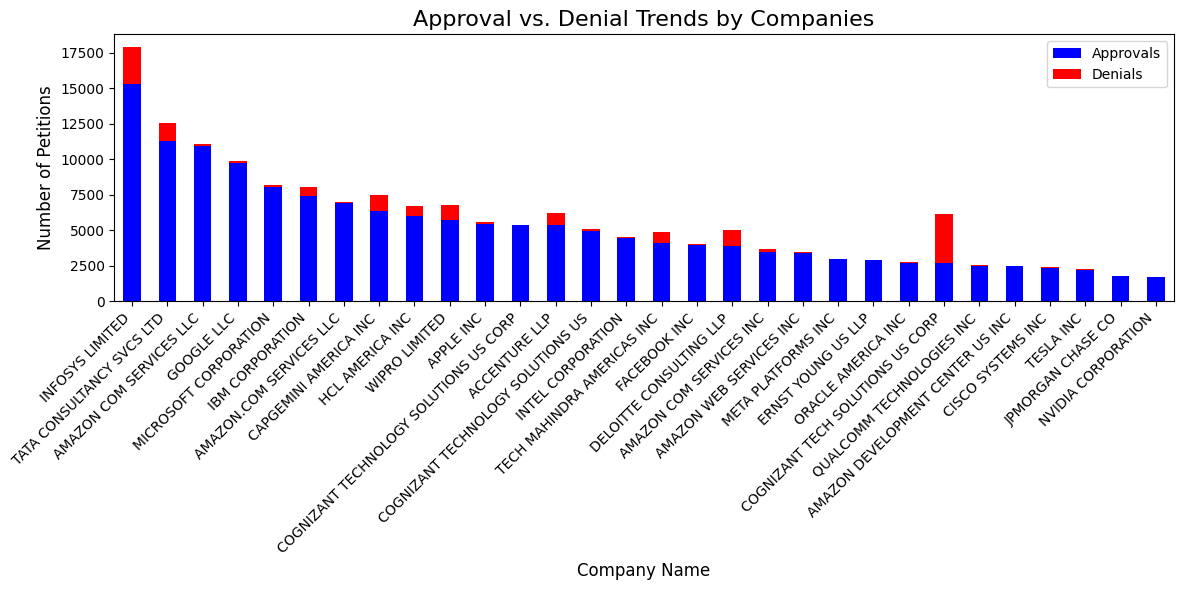

In [11]:
import matplotlib.pyplot as plt
approval_denial_trends = df.groupby("employer_(petitioner)_name")[
    ["initial_approval", "initial_denial"]
].sum()
approval_denial_trends.sort_values(by="initial_approval", ascending=False).head(30).plot(
    kind="bar", figsize=(12, 6), stacked=True, color=["blue", "red"]
)
plt.title("Approval vs. Denial Trends by Companies", fontsize=16)
plt.xlabel("Company Name", fontsize=12)
plt.ylabel("Number of Petitions", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(["Approvals", "Denials"])
plt.tight_layout()
plt.show()

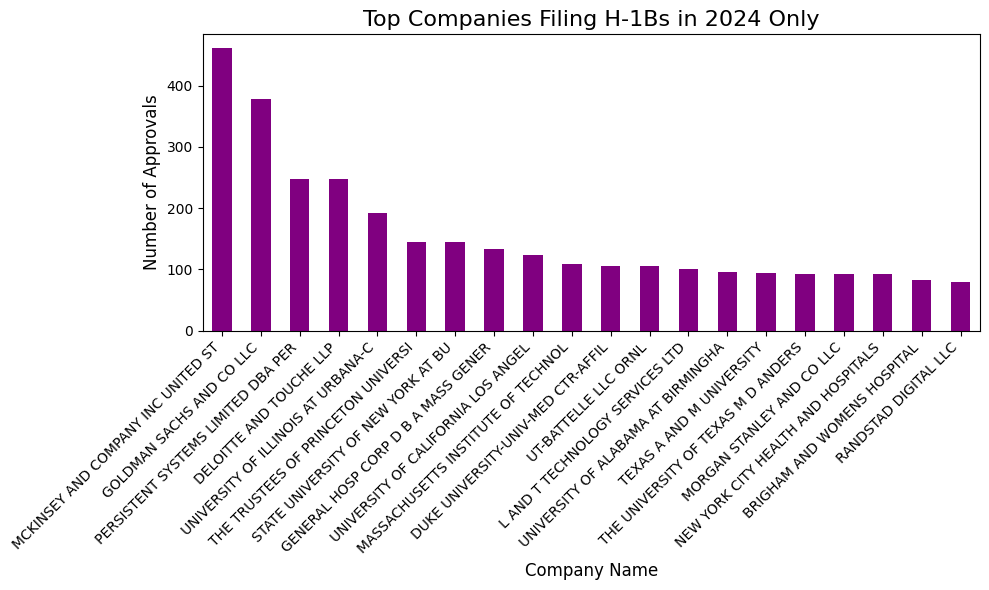

In [12]:
import matplotlib.pyplot as plt

# 1. Target Newer Companies (Startups) - H-1B filings only in 2024
newer_companies = df[
    (df["fiscal_year"].isin([2024])) &
    (~df["employer_(petitioner)_name"].isin(
        df[df["fiscal_year"] < 2024]["employer_(petitioner)_name"].unique()
    ))
]
newer_companies_summary = newer_companies.groupby("employer_(petitioner)_name")["initial_approval"].sum()

# Visualization for newer companies
newer_companies_summary.sort_values(ascending=False).head(20).plot(kind="bar", figsize=(10, 6), color="purple")
plt.title("Top Companies Filing H-1Bs in 2024 Only", fontsize=16)
plt.xlabel("Company Name", fontsize=12)
plt.ylabel("Number of Approvals", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

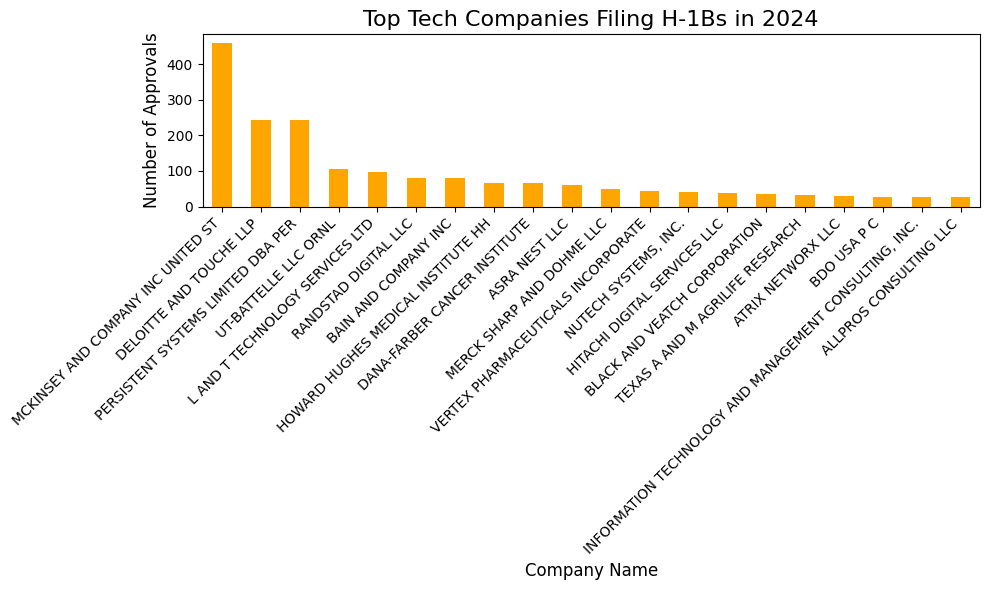

In [13]:
# 2. Tech Sector Focus - Filter by NAICS codes for technology
tech_sector = newer_companies[newer_companies["industry_(naics)_code"].str.startswith("54","51")]
tech_sector_summary = tech_sector.groupby("employer_(petitioner)_name")["initial_approval"].sum()

# Visualization for tech sector companies
tech_sector_summary.sort_values(ascending=False).head(20).plot(kind="bar", figsize=(10, 6), color="orange")
plt.title("Top Tech Companies Filing H-1Bs in 2024", fontsize=16)
plt.xlabel("Company Name", fontsize=12)
plt.ylabel("Number of Approvals", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

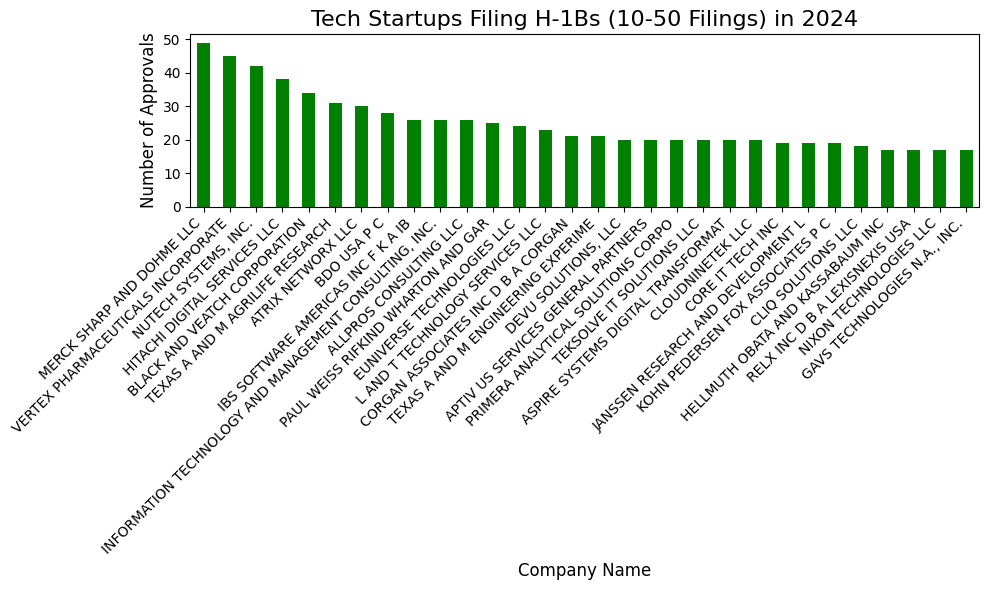

In [14]:
# 3. Moderate H-1B Filings (10-500 Filings)
moderate_filings = tech_sector.groupby("employer_(petitioner)_name").filter(
    lambda x: 10 <= x["initial_approval"].sum() <= 50
)
moderate_filings_summary = moderate_filings.groupby("employer_(petitioner)_name")["initial_approval"].sum()

# Visualization for companies with moderate H-1B filings
moderate_filings_summary.sort_values(ascending=False).head(30).plot(kind="bar", figsize=(10, 6), color="green")
plt.title("Tech Startups Filing H-1Bs (10-50 Filings) in 2024", fontsize=16)
plt.xlabel("Company Name", fontsize=12)
plt.ylabel("Number of Approvals", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

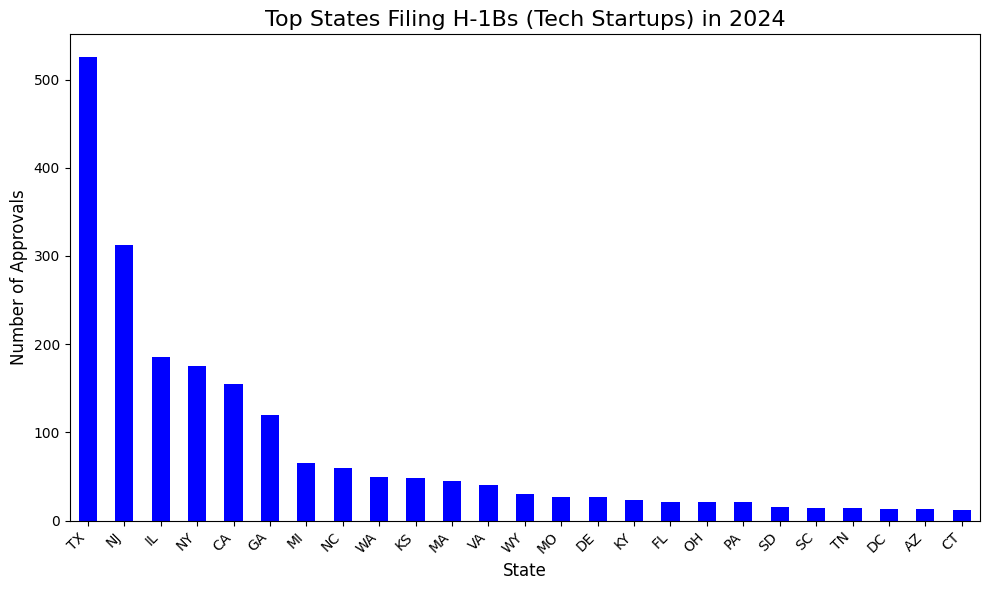

In [15]:
# 5. Geographical Insights - Filings by State
geo_insights = moderate_filings.groupby("petitioner_state")["initial_approval"].sum()

# Visualization for top states filing H-1Bs
geo_insights.sort_values(ascending=False).head(30).plot(kind="bar", figsize=(10, 6), color="blue")
plt.title("Top States Filing H-1Bs (Tech Startups) in 2024", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Number of Approvals", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Texas, New Jersey, Illinois, and New York have the highest number of tech companies with moderate filings (10-50) in 2024.**

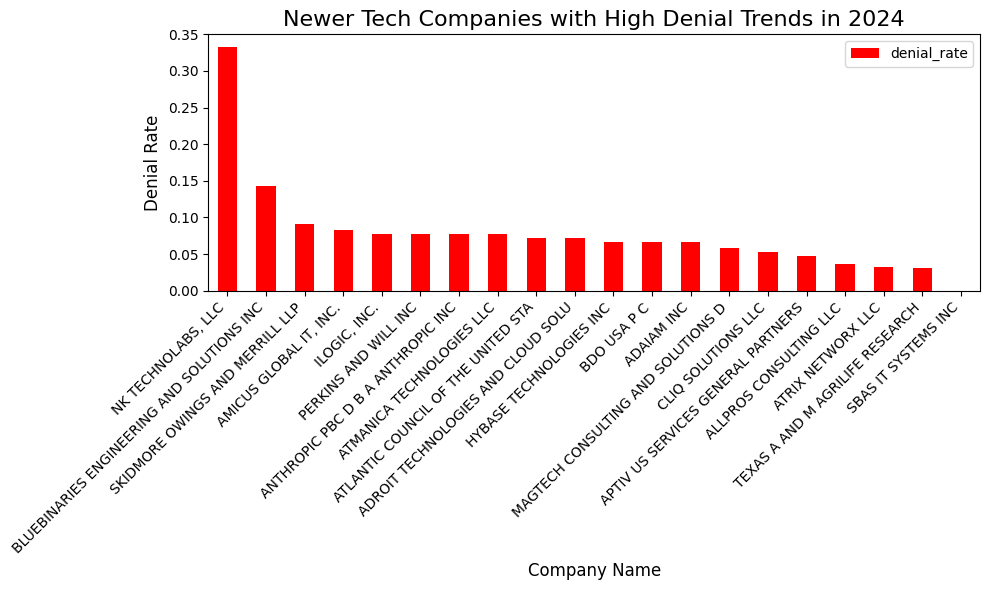

In [17]:
# 6. Denial Rates - Newer Tech Companies with High Denial Trends
denial_rates = (
    moderate_filings.groupby("employer_(petitioner)_name")[["initial_approval", "initial_denial"]]
    .sum()
)
denial_rates["denial_rate"] = (denial_rates["initial_denial"] /
                               (denial_rates["initial_approval"] + denial_rates["initial_denial"]))

# Visualization for top 10 companies with highest denial rates
denial_rates.sort_values("denial_rate", ascending=False).head(20).plot(
    kind="bar", y="denial_rate", figsize=(10, 6), color="red"
)
plt.title("Newer Tech Companies with High Denial Trends in 2024", fontsize=16)
plt.xlabel("Company Name", fontsize=12)
plt.ylabel("Denial Rate", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [22]:
moderate_filings_summary

,initial_approval
employer_(petitioner)_name,
AARIYA TECH INC.,10
ADAIAM INC,14
ADROIT TECHNOLOGIES AND CLOUD SOLU,13
"AIBC SOLUTIONS, LLC",11
ALLIED TEC INC,11
...,...
WALL STREET CONSULTING SERVICES LL,10
WHITE AND CASE LLP,16
X CORP,12


In [37]:
moderate_filings_summary_df = moderate_filings_summary.reset_index()
moderate_filings_summary_df.to_csv('moderate_filings_tech_comp_2024.csv', index=False)

In [23]:
low_filings = tech_sector.groupby("employer_(petitioner)_name").filter(
    lambda x: 5 <= x["initial_approval"].sum() <= 10
)
low_filings_summary = low_filings.groupby("employer_(petitioner)_name")["initial_approval"].sum()
low_filings_summary

,initial_approval
employer_(petitioner)_name,
3A INFOTECH LLC,5
4SPHERE SOFTWARE SOLUTIONS LLC,7
AARIV TECHNOLOGIES INC,6
AARIYA TECH INC.,10
ACEZD CONSULTANCY SERVICES INC,5
...,...
"WESTON & SAMPSON ENGINEERS, INC.",5
WILLKIE FARR AND GALLAGHER LLP,9
WRA ARCHITECTS INC.,5


In [36]:
low_filings_summary_df = low_filings_summary.reset_index()
low_filings_summary_df.to_csv('low_filings_tech_comp_2024.csv', index=False)

##First-Time vs. Continuing Analysis

<ipython-input-28-37b15d3e2ca7>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_new_hire,


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

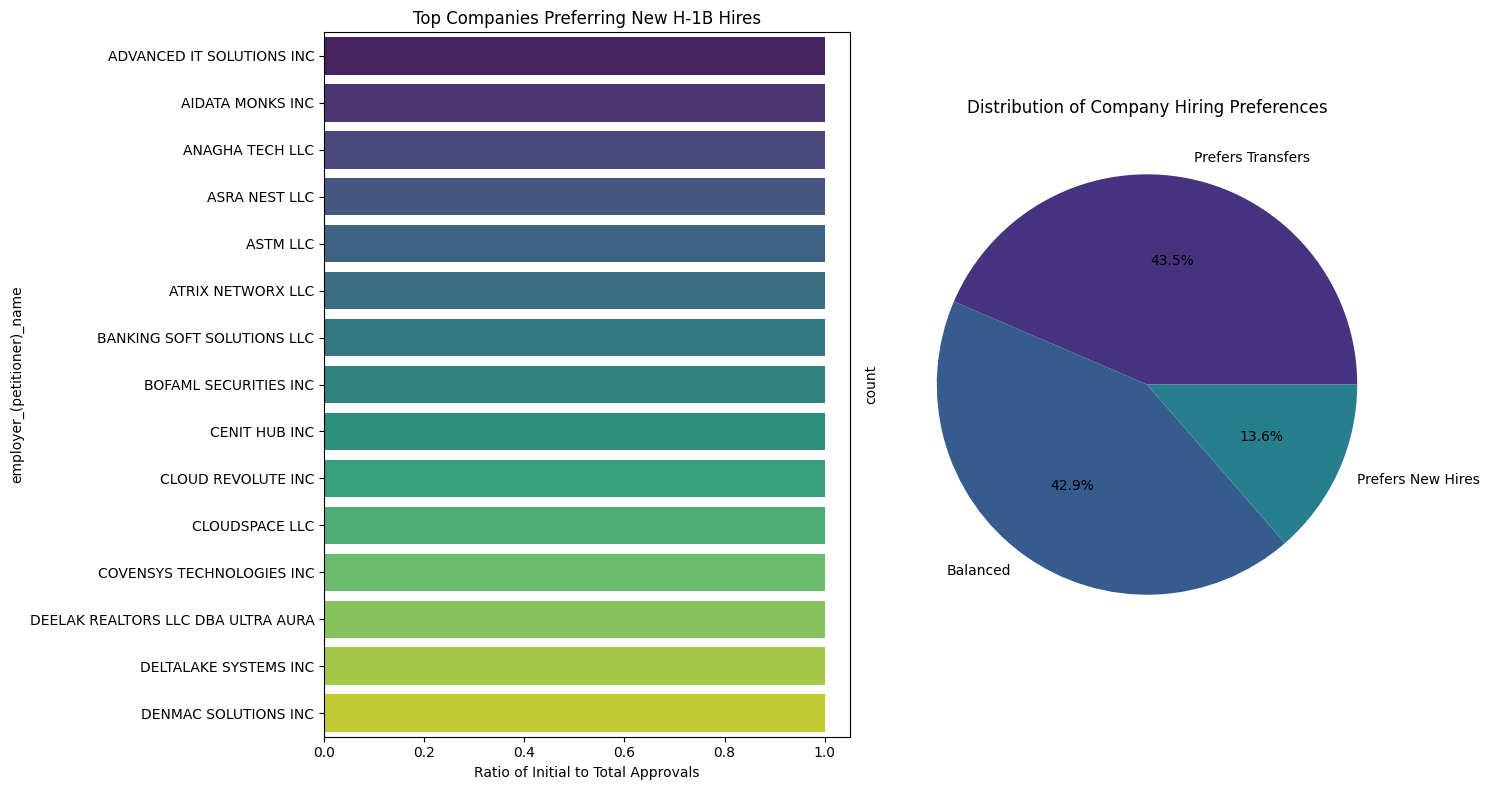

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import zscore

def analyze_hiring_preferences(df):
    """
    Analyze companies' preferences for first-time H-1B holders vs transfers
    """
    # Calculate metrics for each company
    company_metrics = df.groupby('employer_(petitioner)_name').agg({
        'initial_approval': 'sum',
        'continuing_approval': 'sum'
    }).reset_index()

    # Calculate total approvals and ratios
    company_metrics['total_approvals'] = (
        company_metrics['initial_approval'] + company_metrics['continuing_approval']
    )

    # Filter for companies with meaningful number of approvals (e.g., > 5)
    company_metrics = company_metrics[company_metrics['total_approvals'] >= 5]

    # Calculate preference ratio (initial vs continuing)
    company_metrics['initial_ratio'] = (
        company_metrics['initial_approval'] / company_metrics['total_approvals']
    )

    # Categorize companies
    company_metrics['hiring_preference'] = pd.cut(
        company_metrics['initial_ratio'],
        bins=[-np.inf, 0.3, 0.7, np.inf],
        labels=['Prefers Transfers', 'Balanced', 'Prefers New Hires']
    )

    return company_metrics

def visualize_hiring_preferences(company_metrics):
    """
    Create visualizations for hiring preferences
    """
    plt.figure(figsize=(15, 8))

    # Plot top companies for new hires
    top_new_hire = company_metrics[company_metrics['total_approvals'] > 20].nlargest(15, 'initial_ratio')

    plt.subplot(1, 2, 1)
    sns.barplot(data=top_new_hire,
                y='employer_(petitioner)_name',
                x='initial_ratio',
                palette='viridis')
    plt.title('Top Companies Preferring New H-1B Hires')
    plt.xlabel('Ratio of Initial to Total Approvals')

    # Distribution of preferences
    plt.subplot(1, 2, 2)
    company_metrics['hiring_preference'].value_counts().plot(kind='pie',
                                                           autopct='%1.1f%%',
                                                           colors=sns.color_palette('viridis'))
    plt.title('Distribution of Company Hiring Preferences')

    plt.tight_layout()
    return plt

company_metrics = analyze_hiring_preferences(df)
visualize_hiring_preferences(company_metrics)



##Regional Hub Analysis

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

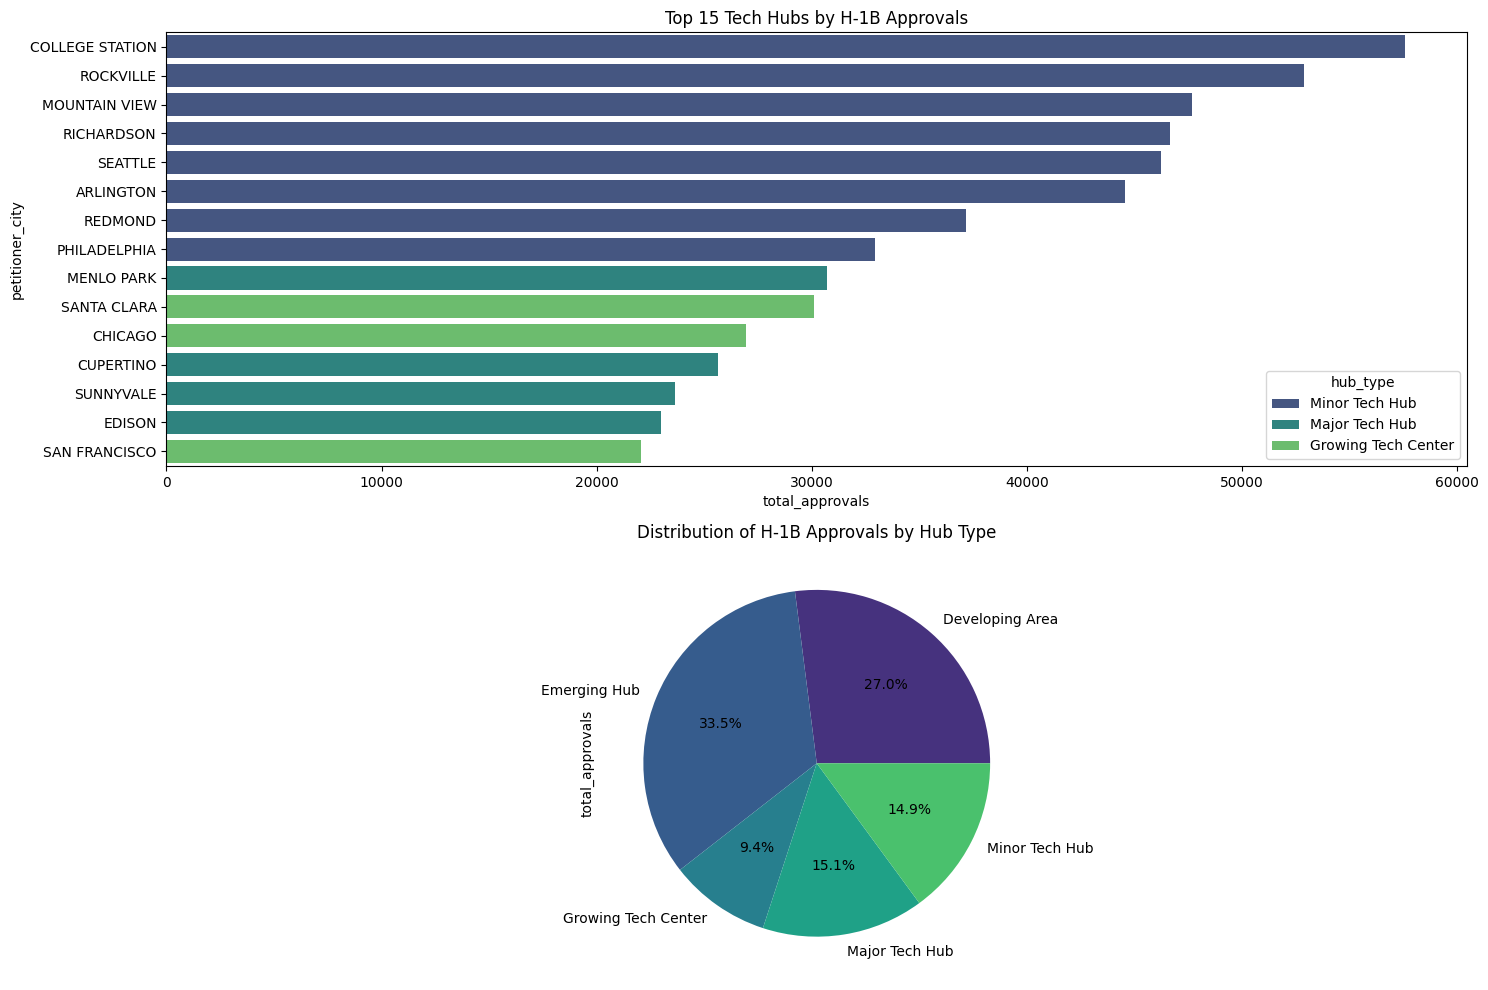

In [29]:
def analyze_regional_hubs(df):
    """
    Perform regional hub analysis including cost of living correlation
    """
    # Group by location
    location_metrics = df.groupby(['petitioner_city', 'petitioner_state', 'petitioner_zip_code']).agg({
        'initial_approval': 'sum',
        'continuing_approval': 'sum',
        'employer_(petitioner)_name': 'nunique'
    }).reset_index()

    # Calculate total approvals
    location_metrics['total_approvals'] = (
        location_metrics['initial_approval'] + location_metrics['continuing_approval']
    )

    # Rename columns for clarity
    location_metrics = location_metrics.rename(columns={
        'employer_(petitioner)_name': 'unique_companies'
    })

    # Normalize metrics for clustering
    clustering_features = ['total_approvals', 'unique_companies']
    location_metrics_normalized = location_metrics.copy()
    location_metrics_normalized[clustering_features] = location_metrics_normalized[clustering_features].apply(zscore)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=5, random_state=42)
    location_metrics['cluster'] = kmeans.fit_predict(location_metrics_normalized[clustering_features])

    # Label clusters based on characteristics
    cluster_labels = {
        0: 'Emerging Hub',
        1: 'Major Tech Hub',
        2: 'Minor Tech Hub',
        3: 'Growing Tech Center',
        4: 'Developing Area'
    }

    location_metrics['hub_type'] = location_metrics['cluster'].map(cluster_labels)

    return location_metrics

def visualize_regional_hubs(location_metrics):
    """
    Create visualizations for regional hub analysis
    """
    plt.figure(figsize=(15, 10))

    # Plot top tech hubs
    plt.subplot(2, 1, 1)
    top_hubs = location_metrics.nlargest(15, 'total_approvals')
    sns.barplot(data=top_hubs,
                x='total_approvals',
                y='petitioner_city',
                hue='hub_type',
                palette='viridis')
    plt.title('Top 15 Tech Hubs by H-1B Approvals')

    # Plot distribution of hub types
    plt.subplot(2, 1, 2)
    hub_distribution = location_metrics.groupby('hub_type')['total_approvals'].sum()
    hub_distribution.plot(kind='pie',
                         autopct='%1.1f%%',
                         colors=sns.color_palette('viridis'))
    plt.title('Distribution of H-1B Approvals by Hub Type')

    plt.tight_layout()
    return plt

location_metrics = analyze_regional_hubs(df)
visualize_regional_hubs(location_metrics)

In [34]:
def get_new_hire_preferring_companies(df):
    """
    Get companies in 2024 (industry codes 51 or 54) that prefer hiring new H-1B applicants.
    """
    # Filter for 2024 and industry codes starting with 51 or 54
    filtered_df = df[
        (df['fiscal_year'] == 2024) &
        (df['industry_(naics)_code'].str.startswith(('51', '54')))
    ]

    # Group by company and calculate totals
    company_metrics = filtered_df.groupby('employer_(petitioner)_name').agg({
        'initial_approval': 'sum',
        'continuing_approval': 'sum'
    }).reset_index()

    # Calculate total approvals and initial hire ratio
    company_metrics['total_approvals'] = (
        company_metrics['initial_approval'] + company_metrics['continuing_approval']
    )
    company_metrics['initial_ratio'] = (
        company_metrics['initial_approval'] / company_metrics['total_approvals']
    )

    # Filter companies that only hire new H-1Bs (initial_ratio = 1)
    new_hire_companies = company_metrics[
        (company_metrics['initial_ratio'] == 1) &
        (company_metrics['total_approvals'] >= 5)  # Optional threshold for meaningful data
    ]

    return new_hire_companies[['employer_(petitioner)_name', 'total_approvals']]
get_new_hire_preferring_companies(df)

,employer_(petitioner)_name,total_approvals
58,3A INFOTECH LLC,5
110,4SPHERE SOFTWARE SOLUTIONS LLC,7
180,A SQUARED BUSINESSES AND CONSULTING LLC,8
199,A2RSYSTEMS INC,5
233,AARIV TECHNOLOGIES INC,6
...,...,...
26019,XINQI LLC,12
26132,YES WE GROUP LLC,7
26235,ZEALOUS SOLUTIONS,8
26272,ZENNITH TECHNOLOGIES INC,9


In [35]:
new_hire_comp = get_new_hire_preferring_companies(df)
new_hire_comp.to_csv('new_hire_companies.csv', index=False)